In [1]:
from IPython.display import display, Math

In [2]:
# As seguintes librarias serão necessárias para resolver os exercícios
# O numpy permite efetuar cálculos de forma eficiente
# sobre vários números (arrays)
import numpy as np
# O matplotlib e o seu módulo pyplot oferecem
# uma interface simples para gerar gráficos
import matplotlib.pyplot as plt

# Exercício 1

Uma bola de futebol é chutada com velocidade de 100 km/h, a fazer um ângulo de 10º com o campo (horizontal).

a) Desenvolva um programa que obtenha a lei do movimento e a lei da velocidade em função do tempo, usando o método de Euler. Considere inicialmente só a força de gravidade.

In [3]:
g = 9.8

# Convert velocity from km/h to m/s
vNorm = 100 * (1000 / 3600)
# Convert angle from degrees to radians
angle = 10 / 180 * np.pi

vXinitial = np.cos(angle) * vNorm
vYinitial = np.sin(angle) * vNorm

In [4]:
# Parâmetros
dt = 0.01
t0 = 0
tf = 1.2
x0 = np.array([0, 0])
v0 = np.array([vXinitial, vYinitial])

# Número de passos/iterações
#
# + 0.1 para garantir que não há arrendodamentos
# para baixo
n = int((tf-t0) / dt + 0.1)
shape = (n + 1, 2)

t = np.zeros(n + 1)
x = np.zeros(shape)
v = np.zeros(shape)
a = np.zeros(shape)

# Insert initial values
a[0] = np.array([0, -g])
v[0] = v0
t[0] = t0
x[0] = x0

for i in range(n):
    a[i + 1] = np.array([0, -g])
    v[i + 1] = v[i] + a[i] * dt
    x[i + 1] = x[i] + v[i] * dt
    t[i + 1] = t[i] + dt

Tem confiança que o seu programa está correto?

¯\\\_(ツ)_/¯

b) Atualize o seu programa de modo a considerar a força de resistência do ar. A força de resistência do ar ao
movimento da bola é:

$$
\left\{
\begin{array}{ll}
      F_x^\text{(res)} = - m D \left\lvert \vec{v} \right\rvert v_x \\
      F_y^\text{(res)} = - m D \left\lvert \vec{v} \right\rvert v_y \\
\end{array} 
\right.
$$

em que $D = g/v_T^2$, e a velocidade terminal é $v_T = 100 \, \text{km/h}$

In [5]:
vT = 100 * (1000 / 3600)
D = g / vT**2

tRes = np.zeros(n + 1)
xRes = np.zeros(shape)
vRes = np.zeros(shape)
aRes = np.zeros(shape)

# Insert initial values
aRes[0] = np.array([0, -g])
vRes[0] = v0
tRes[0] = t0
xRes[0] = x0

for i in range(n):
    vNorm = np.linalg.norm(vRes[i])
    aXRes = -D * vNorm * vRes[i][0]
    aYRes = -D * vNorm * vRes[i][1]
    
    aRes[i + 1] = np.array([aXRes, -g + aYRes])
    vRes[i + 1] = vRes[i] + aRes[i] * dt
    xRes[i + 1] = xRes[i] + vRes[i] * dt
    tRes[i + 1] = tRes[i] + dt

Faça o gráfico da altura em função da distância percorrida na horizontal.

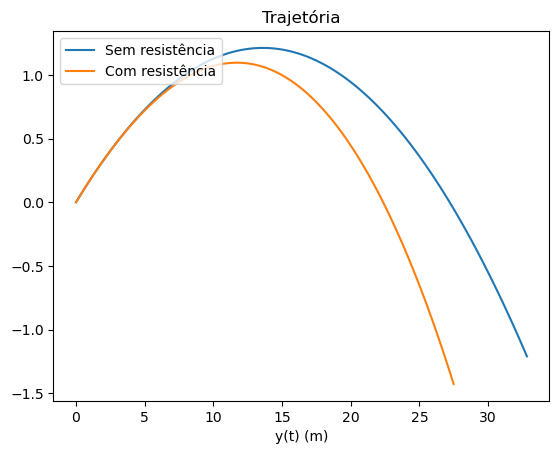

In [6]:
plt.plot(x[:, 0], x[:, 1], label = "Sem resistência")
plt.plot(xRes[:, 0], xRes[:, 1], label = "Com resistência")
plt.xlabel("x(t) (m)")
plt.xlabel("y(t) (m)")
plt.legend(loc="upper left")
plt.title("Trajetória")
plt.show()

c) Nas condições da alínea b), determine qual a altura máxima atingida pela bola e em que instante. Tem confiança
no seu resultado?

In [7]:
idx = xRes[:, 1].argmax()
yMax = xRes[idx, 1]
tMax = t[idx]

In [8]:
display(Math(r'y_{{ \text{{max}} }} = {:.8f}'.format(yMax)))
display(Math(r't_{{ \text{{max}} }} = {:.8f}'.format(tMax)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

d) Nas condições da alínea b), qual o alcance (distância entre a posição onde foi chutada e o ponto onde alcançou no campo) da trajetória da bola e quanto tempo demorou? Tem confiança no seu resultado?

In [9]:
for i in range(n):
    if xRes[i, 1] * xRes[i + 1, 1] < 0:
        idx = i
        break

xRange = xRes[idx, 0]
tRange = t[idx]

In [10]:
display(Math(r'x_{{ \text{{range}} }} = {:.8f}'.format(xRange)))
display(Math(r't_{{ \text{{range}} }} = {:.8f}'.format(tRange)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>